# Финальный проект!
### Попытаемся применить накопленные знания по питону и анализу данных, чтобы сделать что-то полезное

### Данные взяты с работы моего брата!
У моего брата есть зоомагазин и я спросил может ли он дать мне кусочек данных по продажам товаров. 
Цель данного проекта (как он меня попросил) – "узнать что-нибудь полезненькое раз ты изучаешь там свой анализ данных".

P.S. Интересно отметить, что в этом зоомагазине работают свои "программисты и маркетологи". Если по итогам моего анализа будут какие-то интересные результаты – можно будет сравнить с тем, что делают они.

### Описание данных и постановка иссл. вопроса
К сожалению мне дали только "вырезку" данных по продажам за октябрь и не все переменные (потому что "конфиденциальная информация").
Мы имеем следующие переменные (очень странно они называются)

#### 1. Client_id
* Номер клиента (заказа). Он анонимизирован для меня.

#### 2. Animal_type
* Товар для какого животного был куплен: собака, кошка, другой (или общий или другое животное)

#### 3. Session_duration
* Длительность сессии на сайте (как я понял – в секундах, но с каким то ограничением (считается не с первой секунды, останавливается при закрытии вкладки; но будет считать, что количество секунд, проведенных на сайте)

#### 4. Source_id
* Как клиент попал на сайт (SEO - через поиск, REDIRECT - с другого сайта/рекламы на другом сайте, SOCIAL – с социальных сетей, DIRECT - напрямую сайт был введен в адресную строку, без переходов)

#### 5. Click_amount
* Сколько кликов сделал человек на сайте (как мне сказали, это тоже не "точная цифра кликов", а какая-то нормированная/фиксируемая определенным образом; но, к сожалению не сказали как – будем считать, что количество кликов)

#### 6. Order_price
* Цена заказа (если заказа не было – цена = 0)

#### 7. Order_status
* Статус заказа (1 – был заказ; 0 - не было заказа)

#### 8. Client_invite
* Пригласил ли этот пользователь кого-то (новый клиент пришел по реферальной ссылке).

### Ну что-ж, не густно. Но бывало и хуже :)

## Что мы ищем?
Я подумал, что интересно посмотреть на 2 вещи, раз уж они бинарные – кто в итоге покупает товар (**order_st**) и кто приглашает новых клиентов (**client_inv**). 
Если мы получим значимые и интересные результаты – можно будет, к примеру, усилить рекламу на какой-то конкретный ресурс (например на соц. сети или SEO). 
Также можно посмотреть на количество кликов и общую стоимость заказа/статус заказа (вдруг мы заметим, что люди долго ищут какой-то товар?) Хотя у нас нет товаров...
В общем, давайте уже заглянем внутрь и посмотрим от чего зависит **order_st**


### Мне очень нравится, что я смог найти данные, изучение которых пойдёт кому-то на пользу. 
Немного надоело качать данные с кеглов и сайтов для машин лернинг исследований и просто гонять модельки!
Хорошо, что в вашем задании был пункт, про `сделать что-то полезное`, а не просто погонять модельки.

# 0. Работа с данными. Подготовка данных.

### Импортируем данные и библиотеки

In [292]:
import numpy as np # работа с векторами
import matplotlib.pyplot as plt # рисовать графики
import pandas as pd # для работы с матрицами


#Загружаем данные
zoo = pd.read_csv("/Users/paulwalker/Jupyter Python/DATA_PASHA.csv")
zoo2 = zoo
zoo.head()

,CLIENT_ID,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
0,18_10_0026741,DOG,79.83,SEO,35,1516,1,0
1,18_10_0026742,CAT,103.97,REDIRECT,4,745,1,0
2,18_10_0026743,CAT,74.87,SEO,8,0,0,0
3,18_10_0026744,CAT,154.41,SEO,6,182,1,0
4,18_10_0026745,DOG,88.49,REDIRECT,37,725,1,0


### Предлагаю убрать client_id, потому что никакой информации это для нас не несет

In [293]:
zoo = zoo.drop(zoo.columns[0], axis = 1)
zoo.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
0,DOG,79.83,SEO,35,1516,1,0
1,CAT,103.97,REDIRECT,4,745,1,0
2,CAT,74.87,SEO,8,0,0,0
3,CAT,154.41,SEO,6,182,1,0
4,DOG,88.49,REDIRECT,37,725,1,0


### Смотрим на тип наших переменных

In [294]:
zoo.info() #У нас есть две категориальные переменные! Тип животных и источник клиента

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 7 columns):
ANIMAL_TP     1711 non-null object
SESSION_DN    1711 non-null float64
SOURCE_ID     1711 non-null object
CLICK_ANT     1711 non-null int64
ORDER_PRC     1711 non-null int64
ORDER_ST      1711 non-null int64
CLIENT_INV    1711 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 93.6+ KB


In [295]:
zoo.describe() #Не люблю питон за то, что он не может нормально работать с категориальными переменными

,SESSION_DN,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,103.539544,11.331970,505.762127,0.638808,0.132671
std,53.294424,8.479126,711.926234,0.480487,0.339318
min,0.100000,0.000000,0.000000,0.000000,0.000000
25%,60.190000,5.000000,0.000000,0.000000,0.000000
50%,104.030000,8.000000,314.000000,1.000000,0.000000
75%,146.035000,16.000000,725.500000,1.000000,0.000000
max,649.020000,39.000000,4800.000000,1.000000,1.000000


### Давайте заменим категории на цифры (чтобы питону было легче считать)

In [296]:
names = {"ANIMAL_TP":     {"DOG": 1, "CAT": 2, "OTHER": 3},
         "SOURCE_ID": {"SEO": 1, "REDIRECT": 2, "SOCIAL": 3, "DIRECT": 4}}
zoo.replace(names, inplace=True)
zoo.head()
# Мы в шоколаде! Главное теперь не забыть что на что мы заменили :)

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
0,1,79.83,1,35,1516,1,0
1,2,103.97,2,4,745,1,0
2,2,74.87,1,8,0,0,0
3,2,154.41,1,6,182,1,0
4,1,88.49,2,37,725,1,0


### Проверяем тип наших переменных

In [297]:
zoo.info() #супер!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 7 columns):
ANIMAL_TP     1711 non-null int64
SESSION_DN    1711 non-null float64
SOURCE_ID     1711 non-null int64
CLICK_ANT     1711 non-null int64
ORDER_PRC     1711 non-null int64
ORDER_ST      1711 non-null int64
CLIENT_INV    1711 non-null int64
dtypes: float64(1), int64(6)
memory usage: 93.6 KB


### Смотрим дискриптивную статистику еще раз

In [298]:
zoo.describe()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,1.715956,103.539544,2.021625,11.331970,505.762127,0.638808,0.132671
std,0.815047,53.294424,1.024895,8.479126,711.926234,0.480487,0.339318
min,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,60.190000,1.000000,5.000000,0.000000,0.000000,0.000000
50%,1.000000,104.030000,2.000000,8.000000,314.000000,1.000000,0.000000
75%,2.000000,146.035000,3.000000,16.000000,725.500000,1.000000,0.000000
max,3.000000,649.020000,4.000000,39.000000,4800.000000,1.000000,1.000000


по сути такая табличка нам нужна только чтобы посмотреть количество кликов и цену заказов, потому что остальные переменные или категориальные или бинарные

### Строим сводные таблички, чтобы посмотреть на наши данные.

In [299]:
grouped_zoo = zoo.groupby(['ANIMAL_TP'])
grouped_zoo['ORDER_PRC'].describe().unstack()

       ANIMAL_TP
count  1             880.000000
       2             437.000000
       3             394.000000
mean   1             523.556818
       2             499.736842
       3             472.700508
std    1             730.186453
       2             715.109068
       3             666.060001
min    1               0.000000
       2               0.000000
       3               0.000000
25%    1               0.000000
       2               0.000000
       3               0.000000
50%    1             338.000000
       2             282.000000
       3             259.500000
75%    1             733.250000
       2             730.000000
       3             701.750000
max    1            4800.000000
       2            4696.000000
       3            3428.000000
dtype: float64

Количество заказов для животных: 
- собак 880
- кошек 437
- других 394

Средняя стоимость заказа: 
- собаки 523 рубля
- кошки 499 рублей
- остальные 472 рубля

In [300]:
grouped_zoo = zoo.groupby(['ANIMAL_TP', 'ORDER_ST' ])
grouped_zoo['ORDER_PRC'].describe().unstack()

count        mean              std              min        25%  \
ORDER_ST       0      1    0           1    0           1    0     1    0   
ANIMAL_TP                                                                   
1          289.0  591.0  0.0  779.576988  0.0  770.980270  0.0  67.0  0.0   
2          165.0  272.0  0.0  802.886029  0.0  760.556389  0.0  66.0  0.0   
3          164.0  230.0  0.0  809.756522  0.0  698.014209  0.0  71.0  0.0   

                   50%         75%          max          
ORDER_ST        1    0      1    0       1    0       1  
ANIMAL_TP                                                
1          333.50  0.0  602.0  0.0  865.00  0.0  4800.0  
2          349.50  0.0  594.5  0.0  894.25  0.0  4696.0  
3          388.75  0.0  632.0  0.0  914.75  0.0  3428.0


Собаки:
- 591 заказ
- 289 отказов

Кошки: 
- 272 заказа
- 165 отказов

Другие:
- 230 заказов
- 164 отказа

### Попробуем что-нибудь красиво нарисовать

In [301]:
#!pip3 install seaborn
import seaborn as sns

Text(0.5, 1.0, 'Количество заказов по типам животных и источнику прихода клиента')

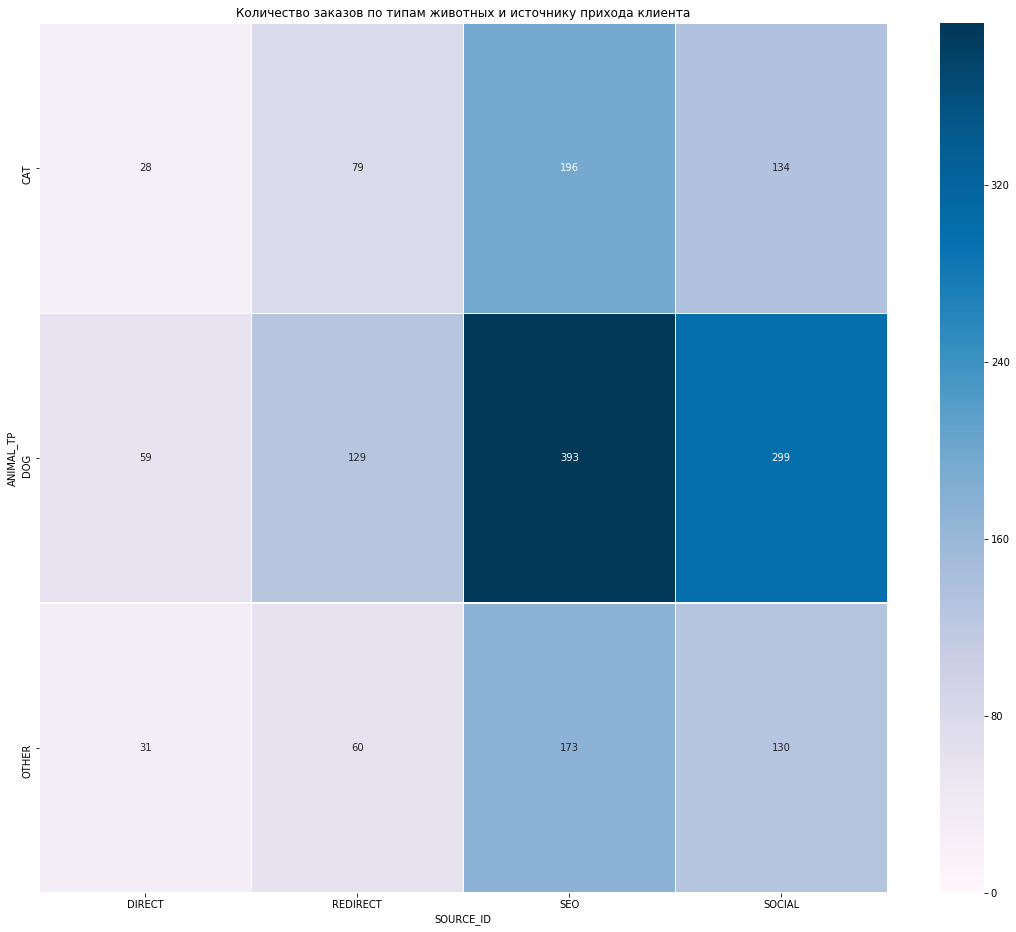

In [302]:
table = pd.pivot_table(zoo2, values=['ORDER_PRC'],index=['ANIMAL_TP'],columns=['SOURCE_ID'],aggfunc='count',margins=False)

plt.figure(figsize=(19,16))
sns.heatmap(table['ORDER_PRC'],linewidths=.10,annot=True,vmin=0.10,fmt= '2.0f', cmap='PuBu')
plt.title('Количество заказов по типам животных и источнику прихода клиента')

 * Может быть это и **не самый лучший хитмэп, который я строил**, но можно заметить, что SEO как источник имеет наибольшее количество заказов (если сравнивать с другими источниками клиентов). 

 * Более того, **больше всего заказов у собак** (больше синих зон, чем у других животных).

### Давайте построим что-то более простое, но наглядное.

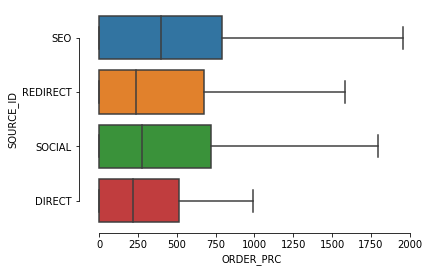

In [303]:
sns.boxplot(x="ORDER_PRC", y="SOURCE_ID",
            data=zoo2, showfliers=False)
sns.despine(offset=5, trim=True)

Цена заказов больше с клиентов, пришедших с поисковика.

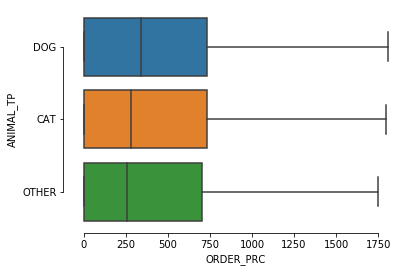

In [304]:
sns.boxplot(x="ORDER_PRC", y="ANIMAL_TP",
            data=zoo2, showfliers=False)
sns.despine(offset=5, trim=True)

Собачьи заказы дороже, чем остальные

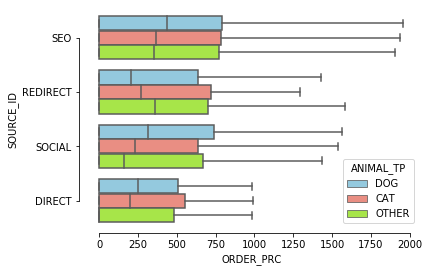

In [305]:
sns.boxplot(x="ORDER_PRC", y="SOURCE_ID",
            hue="ANIMAL_TP", palette=["skyblue", "salmon", "greenyellow"],
            data=zoo2, showfliers=False)
sns.despine(offset=5, trim=True)

Интересно отметить, что заказы, которые направлены с других сайтов (**redirect**) больше идут по "другим" типам товаров (не конкретно собачьи или кошачьи).
А те, кто заходят на сайт специально (**direct**) практически не заказывают "другие" типы товаров.

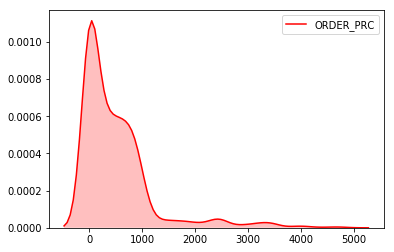

In [306]:
# с нулевыми заказами
p1=sns.kdeplot(zoo2['ORDER_PRC'], shade=True, color="r")

Цена распределена немного странно. Но сокрее всего такое распределение получилось из-за 2-х факторов: 
- У нас в данных есть заказы без цены (те, которые не произошли, ORDER_ST = 0)
- У нас только часть данных за определенный период

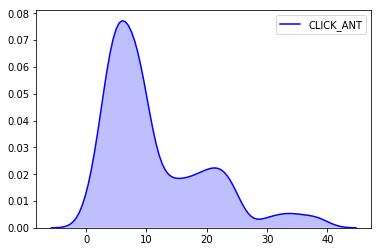

In [307]:
# с нулевыми заказами
p1=sns.kdeplot(zoo2['CLICK_ANT'], shade=True, color="b")

Распределение количества кликов по нашему сайту. Интересно, что большинство кликов находится в диапазоне от 0 до 10. Наверное это означает, что сайт хорошо сделан и человеку не нужно долго кликать и искать нужный товар. Или, возможно, у нас есть много клиентов, которые ничего не заказывали и => мало кликали по сайту.

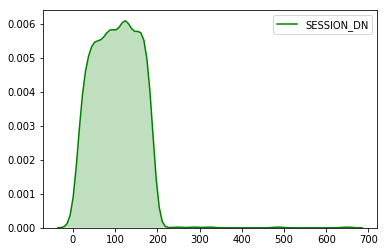

In [308]:
# С нулевыми заказами
p1=sns.kdeplot(zoo2['SESSION_DN'], shade=True, color="g")

Распределение длительности пребывания на сайте. 

### Давайте уберем нулевые заказы и посморим как изменились распределения

In [309]:
zoo3 = zoo.query("ORDER_PRC != '0'")

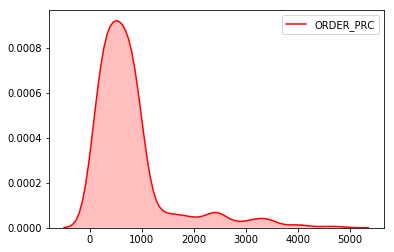

In [310]:
# без нулевых заказов
p1=sns.kdeplot(zoo3['ORDER_PRC'], shade=True, color="r")

Цена сдвинулась ближе к 1000 рублей. (логично, мы же убрали значения 0 рублей (**order_st = 1**)

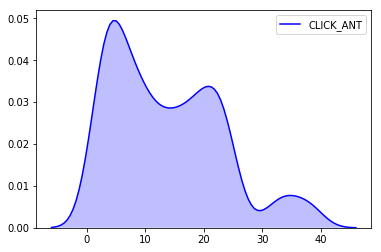

In [311]:
# без нулевых заказов
p1=sns.kdeplot(zoo3['CLICK_ANT'], shade=True, color="b")

Интересно, теперь увеличилось количество кликов от 10 до 20. Наверное ушли те люди, которые зашли на сайт, посмотрели быстро и ушли (ничего не заказав).

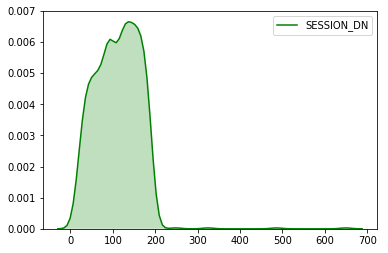

In [312]:
# без нулевых заказов
p1=sns.kdeplot(zoo3['SESSION_DN'], shade=True, color="g")

Время пребывания на сайте также возросло.

# Гипотезы и построение моделей

На основе дискриптивной статистики (я постарался сделать её как можно разнообразнее – насколько мне хватает навыков питона) можно сделать некоторые выводы.

### 1. Собачьих товаров больше в целом
### 2. Собачьих товаров больше куплено
### 3. SEO - самый частый источник прихода клиентов
### 4. Длительность сессии на сайте, количество кликов по сайту, стоимость заказа выше, когда нет нулевых заказов

Думаю, что перечисленные выше факторы будут весомыми при построение классификационных моделей. 
К сожалению, здесь непонятна `каузальная` связь (потому что переменные будут связаны в двустороннем порядке).
Несмотря на это давайте попробуем построить модели.

## Модели

In [313]:
zoo4 = zoo
zoo4.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
0,1,79.83,1,35,1516,1,0
1,2,103.97,2,4,745,1,0
2,2,74.87,1,8,0,0,0
3,2,154.41,1,6,182,1,0
4,1,88.49,2,37,725,1,0


In [314]:
#уберем переменную про приглашение клиентов, потому что будем её предсказывать/использовать потом
zoo4 = zoo4.drop(zoo4.columns[6], axis = 1) 
zoo4.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST
0,1,79.83,1,35,1516,1
1,2,103.97,2,4,745,1
2,2,74.87,1,8,0,0
3,2,154.41,1,6,182,1
4,1,88.49,2,37,725,1


In [315]:
X = zoo4.iloc[:,0:5].values
y = zoo4.iloc[:,5].values

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)


results = cross_val_score(logreg, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

О нет....................

In [318]:
# с регуляризацией
logreg2 = LogisticRegression(C=4)
logreg2.fit(X_train, y_train)
logreg2.score(X_train, y_train), logreg2.score(X_test, y_test)
results = cross_val_score(logreg2, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

Нет.......................

In [319]:
# дерево
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)
#print(tree.score(X_train, y_train), tree.score(X_test, y_test))

results = cross_val_score(tree, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

1.0

Пожалуйста............

In [320]:
from sklearn.ensemble import VotingClassifier
modelVote = VotingClassifier(estimators=[('lr', logreg), ('dt', tree), ('lrreg', logreg2)], voting='hard')
modelVote.fit(X_train,y_train)
modelVote.score(X_train,y_train), modelVote.score(X_test,y_test)

results = cross_val_score(modelVote, X_train, y_train, cv=3)
# результаты кросс-валидации
results

results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

1.0

Такой подставы я не ожидал.......

In [321]:
from sklearn.ensemble import ExtraTreesClassifier
modelET = ExtraTreesClassifier(n_estimators=100, max_features=5)
modelET.fit(X_train, y_train)
modelET.score(X_train, y_train), modelET.score(X_test, y_test)

results = cross_val_score(modelET, X_train, y_train, cv=3)
# результаты кросс-валидации
results

results.mean()

1.0

Жесть...

In [322]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(n_estimators=100)
modelGB.fit(X_train, y_train)
modelGB.score(X_train, y_train), modelGB.score(X_test, y_test)

results = cross_val_score(modelGB, X_train, y_train, cv=3)
# результаты кросс-валидации
results

results.mean()

1.0

Пожалуй, этого достаточно!

## Итог первого этапа..
Кто же знал, что мне дадут настолько скоррелированные данные. **Это ужас!** 
Мы не можем учить модели на этих данных, потому что переменные слишком сильно коррелируют и все модели дают результат 1.0....

## Не будем сдаваться. Давайте отфильтруем данные только по собакам (потому что их больше всего) и попробуем еще раз.

In [323]:
zoo5 = zoo4

In [324]:
zoo5.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST
0,1,79.83,1,35,1516,1
1,2,103.97,2,4,745,1
2,2,74.87,1,8,0,0
3,2,154.41,1,6,182,1
4,1,88.49,2,37,725,1


In [325]:
zoo5 = zoo4.query("ANIMAL_TP == '1'")
zoo5.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST
0,1,79.83,1,35,1516,1
4,1,88.49,2,37,725,1
5,1,188.51,3,7,2456,1
7,1,32.61,3,1,928,1
8,1,48.64,3,3,128,1


In [326]:
X = zoo5.iloc[:,0:5].values
y = zoo5.iloc[:,5].values

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)


results = cross_val_score(logreg, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9982905982905983

In [329]:
# с регуляризацией
logreg2 = LogisticRegression(C=4)
logreg2.fit(X_train, y_train)
logreg2.score(X_train, y_train), logreg2.score(X_test, y_test)
results = cross_val_score(logreg2, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9982905982905983

In [330]:
# дерево
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)
#print(tree.score(X_train, y_train), tree.score(X_test, y_test))

results = cross_val_score(tree, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

1.0

In [331]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, max_features=5)
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)

results = cross_val_score(modelRF, X_train, y_train, cv=3)
# результаты кросс-валидации
results

results.mean()

1.0

### Это тоже никуда не годится. Давайте взглянем на других животных. Кошки.

In [332]:
zoo5 = zoo4.query("ANIMAL_TP == '2'")
zoo5.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST
1,2,103.97,2,4,745,1
2,2,74.87,1,8,0,0
3,2,154.41,1,6,182,1
13,2,114.46,1,10,361,1
17,2,177.41,3,18,570,1


In [333]:
X = zoo5.iloc[:,0:5].values
y = zoo5.iloc[:,5].values

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)


results = cross_val_score(logreg, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [336]:
# дерево
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)
#print(tree.score(X_train, y_train), tree.score(X_test, y_test))

results = cross_val_score(tree, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

1.0

## На остальных животных я даже пробовать не буду...
К сожалению, исследование факторов, влияющих на заказ провести не удастся. Я очень надеюсь, что мои труды не пропали напрасно... 

`Жаль, что не получилось изучить интересный, практически полезный кейс.`

## Ну ничего, такое бывает. 
Давайте попробуем взглянуть на **приглашение клиента** (CLIENT_INV). Надеюсь, всё получится.

In [337]:
zoo6 = zoo
zoo6.head()

,ANIMAL_TP,SESSION_DN,SOURCE_ID,CLICK_ANT,ORDER_PRC,ORDER_ST,CLIENT_INV
0,1,79.83,1,35,1516,1,0
1,2,103.97,2,4,745,1,0
2,2,74.87,1,8,0,0,0
3,2,154.41,1,6,182,1,0
4,1,88.49,2,37,725,1,0


In [338]:
X = zoo6.iloc[:,0:6].values
y = zoo6.iloc[:,6].values

In [339]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)


results = cross_val_score(logreg, X_train, y_train, cv=3)
# результаты кросс-валидации
results
results.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8657894736842106

In [341]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(n_estimators=100)
modelGB.fit(X_train, y_train)
modelGB.score(X_train, y_train), modelGB.score(X_test, y_test)

results = cross_val_score(modelGB, X_train, y_train, cv=3)
# результаты кросс-валидации
results

results.mean()

0.8447368421052631

# УРА!!!!! Получились модели!
Я оставил 2 лучшие (те, что лучше всего работали)


## Давайте  теперь посмотрим на коэффициенты

In [342]:
import eli5
names = list(zoo6)
names
eli5.show_weights(logreg, feature_names=names[:6])

Weight?,Feature
+0.062,ORDER_ST
+0.007,CLICK_ANT
+0.000,ORDER_PRC
-0.001,SESSION_DN
-0.010,SOURCE_ID
-0.017,ANIMAL_TP
-1.828,<BIAS>


Да уж... результаты не самые "лучшие". Человек, который заказывает – приглашает новых клиентов.

In [343]:
eli5.show_weights(modelGB, feature_names=names[:6])

Weight,Feature
0.4941 ± 0.6823,SESSION_DN
0.3046 ± 0.6844,ORDER_PRC
0.1332 ± 0.2647,CLICK_ANT
0.0361 ± 0.1921,SOURCE_ID
0.0293 ± 0.1486,ANIMAL_TP
0.0026 ± 0.0613,ORDER_ST


Тут более интересно. Пригласит ли челове кнового клиента зависит от длительности нахождения на сайте и суммы заказа. 
В целом, это довольно "банальный" результат для наших данных. Но это лучше, чем ничего.

#  Давайте подведем итог работы:

Целью данного **"исследования"** было помочь брату с улучшением продаж в его зоомагазине. 

### `Данная задача решалась двумя способами: `
1. Была идея предсказать какие переменные влияют на то, что человек **сделает заказ на сайте**

* К сожалению, данные были сильно скоррелированы, поэтому мы **не смогли построить размуные/рабочие модели** для изучения зависимостей.
* Но, благодаря дискриптивной аналитике, мы увидели, что большинство заказов приходится на **собачьи** товары и SEO является лучшим средством для привлечения клиентов (на данный момент/на наших данных).

2. После неудачи с предсказанием заказа на сайте, мы начали изучать что влияет на то, пригласит ли человек нового клиента (вероятно своего друга).

* Результаты регресси показали банальную корреляцию (если ты оставляешь заказ -> ты приведешь друга)
* Результаты градиентного бустинга показали, что длительность сессии человека на сайте, а также стоимость его заказа положительно влияют на привлечение новых клиентов.

### `Совет, который можно дать брату и его компании:`

1. Если вы берете брата в качестве аналитика – давайте ему **бòльший** набор данных, чтобы можно было разгуляться.
2. На основе текущего анализа можно сказать, что собачники составляют наибольшее количество клиентов в текущем периоде. => можно закупить больше "собачьих" товаров, чтобы не было проблем с предложением для клиентов.
3. Кошатники и другие заметно проседают по продажам, возможно, стоит сделать акцент в рекламе именно на них.
4. SEO - отличный источник трафика (можно попробовать на него поднажать/вложить больше денег в рекламу).
5. Если необходимо продавать "другие" товары (не кошкам и не собакам) – то *redirect** отличный источник трафика (=> нужно больше вкладываться в рекламу на сайтах партнеров).
6. Для увеличения сетевого эффекта и привлечения дополнительных клиентов – стоит ввести програмы лояльности для постоянных клиентов (тех, кто делает заказы) + для тех, кто тратит бòльшие суммы на сайте. Таким образом, вы поощрите их и они будут звать новых клиентов.